# NYC Property Sales Data Analysis and Machine Learning Program

### Load the Data

In [1]:
import time
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nyc_property_sales = pd.read_csv('data/NYC_Property_Sales.csv')
nyc_property_sales.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [3]:
nyc_property_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
nyc_property_sales['SALE PRICE'].astype('category').value_counts().head(20)

 -         14561
0          10228
10           766
450000       427
550000       416
650000       414
600000       409
700000       382
400000       378
750000       377
300000       351
500000       350
350000       345
800000       331
900000       324
250000       314
850000       309
950000       301
1100000      298
1200000      286
Name: SALE PRICE, dtype: int64

In [5]:
prices = nyc_property_sales['SALE PRICE']\
    .astype('category')\
    .apply(lambda x: 0 if '-' in x else int(x))\
    .unique()

prices.sort()
prices[:100]

array([    0,     1,     2,     3,     5,     8,    10,    19,    20,
         100,   200,   210,   250,   300,   315,   373,   500,   501,
         600,   750,  1000,  1110,  1162,  1175,  1200,  1275,  1500,
        2000,  2096,  2200,  2352,  2400,  2500,  2510,  2800,  3000,
        3001,  3012,  3500,  3750,  3774,  4000,  4063,  4500,  4900,
        5000,  5500,  5700,  5970,  5997,  6000,  6024,  6081,  6400,
        6438,  6500,  6760,  7000,  7100,  7500,  7684,  7750,  7923,
        7928,  8000,  8500,  8750,  8909,  9500,  9594,  9828, 10000,
       10001, 10040, 10050, 10140, 10167, 10500, 11000, 11250, 11540,
       11750, 12000, 12040, 12050, 12168, 12346, 12500, 12950, 13000,
       13864, 13870, 13912, 14000, 14167, 14291, 14937, 14957, 15000,
       15060])

In [6]:
nyc_property_sales[nyc_property_sales['SALE PRICE'] == '3']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
21480,3178,2,MORRISANIA/LONGWOOD,05 TAX CLASS 1 VACANT LAND,1B,2384,20,,V0,439 EAST 162 STREET,...,0,0,0,99457,0,0,1,V0,3,2016-12-28 00:00:00
62516,13118,4,HOLLIS,01 ONE FAMILY DWELLINGS,1,10850,29,,A1,99-19 203RD STREET,...,1,0,1,2500,1208,1930,1,A1,3,2017-02-23 00:00:00


In [7]:
nyc_property_sales['NEIGHBORHOOD'].astype('category').value_counts()

FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
VAN CORTLANDT PARK             2
PELHAM BAY                     1
BRONX PARK                     1
CITY ISLAND-PELHAM STRIP       1
EAST RIVER                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

In [8]:
years_built = nyc_property_sales['YEAR BUILT'].unique()
years_built.sort()
years_built

array([   0, 1111, 1680, 1800, 1826, 1829, 1832, 1835, 1840, 1844, 1845,
       1846, 1847, 1849, 1850, 1851, 1852, 1854, 1855, 1856, 1864, 1865,
       1870, 1871, 1875, 1880, 1881, 1882, 1883, 1888, 1889, 1890, 1891,
       1892, 1893, 1894, 1895, 1896, 1898, 1899, 1900, 1901, 1902, 1903,
       1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914,
       1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925,
       1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 20

In [9]:
nyc_property_sales[nyc_property_sales['YEAR BUILT'] == 1111]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
957,961,1,CHELSEA,29 COMMERCIAL GARAGES,4,799,70,,G6,7 AVENUE,...,0,0,0,2125,-,1111,4,G6,8208750,2017-04-21 00:00:00


In [10]:
nyc_property_sales['BOROUGH'].astype('category').value_counts()

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

In [11]:
# NYC Tax Classes: https://www1.nyc.gov/site/finance/taxes/definitions-of-property-assessment-terms.page
nyc_property_sales['TAX CLASS AT PRESENT'].astype('category').value_counts()

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [12]:
nyc_property_sales['EASE-MENT'].unique()

array([' '], dtype=object)

In [13]:
nyc_property_sales['BUILDING CLASS CATEGORY'].astype('category').value_counts()

01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

In [14]:
len(nyc_property_sales['BLOCK'].unique())

11566

In [15]:
len(nyc_property_sales['NEIGHBORHOOD'].unique())

254

In [16]:
len(nyc_property_sales['ZIP CODE'].unique())

186

### Chart the Data

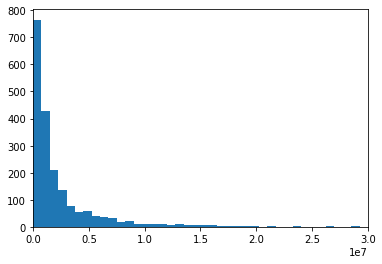

In [17]:
plt.hist(nyc_property_sales['SALE PRICE'][:2_000].apply(lambda x: 0 if '-' in x else int(x)), bins=200)
plt.xlim(0, 30_000_000)
plt.show()

### Split the Data into Test and Training Sets

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(nyc_property_sales, test_size=0.2, random_state=42)

### Clean the Data

First create the dataset that is passed to the ML algorithm.

In [40]:
clean_data = train_set.drop(['Unnamed: 0', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER'], axis=1)

clean_data['SALE PRICE'] = clean_data['SALE PRICE'].replace(r'^\s+-\s+$', '0', regex=True)
clean_data['SALE PRICE'] = clean_data['SALE PRICE'].astype(int)
clean_data = clean_data[~clean_data['SALE PRICE'].isnull()]
clean_data = clean_data[clean_data['SALE PRICE'] > 100_000]

clean_data['LAND SQUARE FEET'] = \
    clean_data['LAND SQUARE FEET']\
        .replace(r'^\s+-\s+$', -1, regex=True)\
        .astype(int)\
        .replace(-1, np.nan)

clean_data['GROSS SQUARE FEET'] = \
    clean_data['GROSS SQUARE FEET']\
        .replace(r'^\s+-\s+$', -1, regex=True)\
        .astype(int)\
        .replace(-1, np.nan)

def convert_to_unix(x: str) -> int:
    ts = datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    return int(time.mktime(ts.timetuple()))

clean_data['SALE DATE'] = clean_data['SALE DATE'].apply(convert_to_unix)

clean_data['BOROUGH'] = clean_data['BOROUGH'].map({
    1: 'MANHATTAN', 
    2: 'BRONX', 
    3: 'BROOKLYN', 
    4: 'QUEENS', 
    5: 'STATEN ISLAND'
})

clean_data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
79255,STATEN ISLAND,HUGUENOT,01 ONE FAMILY DWELLINGS,1,6846,37,A2,10312,1,0,1,6040.0,2510.0,1978,1,A2,610000,1478667600
39797,BROOKLYN,GOWANUS,13 CONDOS - ELEVATOR APARTMENTS,2,444,1204,R4,11231,1,0,1,0.0,0.0,2015,2,R4,2803187,1480482000
3000,MANHATTAN,FLATIRON,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,818,1103,R1,10011,1,0,1,NaN,NaN,1910,2,R1,3871895,1493784000
74158,QUEENS,ST. ALBANS,01 ONE FAMILY DWELLINGS,1,11022,70,A1,11412,1,0,1,3000.0,2239.0,1935,1,A1,478500,1478145600
79757,STATEN ISLAND,MARINERS HARBOR,27 FACTORIES,4,1257,75,F1,10303,0,1,1,10300.0,5000.0,1950,4,F1,925000,1478494800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82386,STATEN ISLAND,ROSSVILLE,01 ONE FAMILY DWELLINGS,1,7084,63,A5,10309,1,0,1,929.0,1870.0,1993,1,A5,245000,1490587200
54886,QUEENS,ELMHURST,03 THREE FAMILY DWELLINGS,1,1495,25,C0,11373,3,0,3,2000.0,3360.0,1925,1,C0,1430000,1483592400
76820,STATEN ISLAND,BULLS HEAD,01 ONE FAMILY DWELLINGS,1,1680,253,A5,10303,1,0,1,1476.0,1159.0,1988,1,A5,350000,1473652800
860,MANHATTAN,CHELSEA,17 CONDO COOPS,2,721,1008,R9,10011,0,0,0,NaN,NaN,1932,2,R9,3200000,1473912000


In [41]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45647 entries, 79255 to 15795
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         45647 non-null  object 
 1   NEIGHBORHOOD                    45647 non-null  object 
 2   BUILDING CLASS CATEGORY         45647 non-null  object 
 3   TAX CLASS AT PRESENT            45647 non-null  object 
 4   BLOCK                           45647 non-null  int64  
 5   LOT                             45647 non-null  int64  
 6   BUILDING CLASS AT PRESENT       45647 non-null  object 
 7   ZIP CODE                        45647 non-null  int64  
 8   RESIDENTIAL UNITS               45647 non-null  int64  
 9   COMMERCIAL UNITS                45647 non-null  int64  
 10  TOTAL UNITS                     45647 non-null  int64  
 11  LAND SQUARE FEET                29170 non-null  float64
 12  GROSS SQUARE FEET           

Second, create the labels (the correct answers to the problem that the machine learning algorithm attempts 
to solve: what the sale price is for a property).

In [42]:
nyc_property_sales_labels = clean_data['SALE PRICE'].copy()
nyc_property_sales_labels

79255     610000
39797    2803187
3000     3871895
74158     478500
79757     925000
          ...   
82386     245000
54886    1430000
76820     350000
860      3200000
15795    1800000
Name: SALE PRICE, Length: 45647, dtype: int64

Third, remove the label column from the data that is passed to the ML algorithm.

In [43]:
nyc_property_sales_final_data = clean_data.drop('SALE PRICE', axis=1)
nyc_property_sales_final_data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE
79255,STATEN ISLAND,HUGUENOT,01 ONE FAMILY DWELLINGS,1,6846,37,A2,10312,1,0,1,6040.0,2510.0,1978,1,A2,1478667600
39797,BROOKLYN,GOWANUS,13 CONDOS - ELEVATOR APARTMENTS,2,444,1204,R4,11231,1,0,1,0.0,0.0,2015,2,R4,1480482000
3000,MANHATTAN,FLATIRON,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,818,1103,R1,10011,1,0,1,NaN,NaN,1910,2,R1,1493784000
74158,QUEENS,ST. ALBANS,01 ONE FAMILY DWELLINGS,1,11022,70,A1,11412,1,0,1,3000.0,2239.0,1935,1,A1,1478145600
79757,STATEN ISLAND,MARINERS HARBOR,27 FACTORIES,4,1257,75,F1,10303,0,1,1,10300.0,5000.0,1950,4,F1,1478494800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82386,STATEN ISLAND,ROSSVILLE,01 ONE FAMILY DWELLINGS,1,7084,63,A5,10309,1,0,1,929.0,1870.0,1993,1,A5,1490587200
54886,QUEENS,ELMHURST,03 THREE FAMILY DWELLINGS,1,1495,25,C0,11373,3,0,3,2000.0,3360.0,1925,1,C0,1483592400
76820,STATEN ISLAND,BULLS HEAD,01 ONE FAMILY DWELLINGS,1,1680,253,A5,10303,1,0,1,1476.0,1159.0,1988,1,A5,1473652800
860,MANHATTAN,CHELSEA,17 CONDO COOPS,2,721,1008,R9,10011,0,0,0,NaN,NaN,1932,2,R9,1473912000


In [44]:
nyc_property_sales_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45647 entries, 79255 to 15795
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         45647 non-null  object 
 1   NEIGHBORHOOD                    45647 non-null  object 
 2   BUILDING CLASS CATEGORY         45647 non-null  object 
 3   TAX CLASS AT PRESENT            45647 non-null  object 
 4   BLOCK                           45647 non-null  int64  
 5   LOT                             45647 non-null  int64  
 6   BUILDING CLASS AT PRESENT       45647 non-null  object 
 7   ZIP CODE                        45647 non-null  int64  
 8   RESIDENTIAL UNITS               45647 non-null  int64  
 9   COMMERCIAL UNITS                45647 non-null  int64  
 10  TOTAL UNITS                     45647 non-null  int64  
 11  LAND SQUARE FEET                29170 non-null  float64
 12  GROSS SQUARE FEET           

Next, use scikit-learn's `Pipeline` and `ColumnTransformer` classes to clean the data.

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

num_attributes = [
    'BLOCK', 
    'LOT',
    'ZIP CODE',
    'RESIDENTIAL UNITS',
    'COMMERCIAL UNITS',
    'TOTAL UNITS',
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET',
    'YEAR BUILT',
    'TAX CLASS AT TIME OF SALE',
    'SALE DATE'
]

cat_attributes = [
    'BOROUGH', 
    'NEIGHBORHOOD', 
    'BUILDING CLASS CATEGORY', 
    'TAX CLASS AT PRESENT', 
    'BUILDING CLASS AT PRESENT', 
    'BUILDING CLASS AT TIME OF SALE'
]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])

In [46]:
nyc_property_sales_prepared = full_pipeline.fit_transform(nyc_property_sales_final_data)
nyc_property_sales_prepared

<45647x614 sparse matrix of type '<class 'numpy.float64'>'
	with 775999 stored elements in Compressed Sparse Row format>

In [47]:
all_attributes = num_attributes

for cat_attribute in cat_attributes:
    cat_encoder = OneHotEncoder()
    cat_encoder.fit_transform(nyc_property_sales_final_data[[cat_attribute]])
    all_attributes += list(cat_encoder.categories_[0])

all_attributes

['BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'SALE DATE',
 'BRONX',
 'BROOKLYN',
 'MANHATTAN',
 'QUEENS',
 'STATEN ISLAND',
 'AIRPORT LA GUARDIA',
 'ALPHABET CITY',
 'ANNADALE',
 'ARDEN HEIGHTS',
 'ARROCHAR',
 'ARROCHAR-SHORE ACRES',
 'ARVERNE',
 'ASTORIA',
 'BATH BEACH',
 'BATHGATE',
 'BAY RIDGE',
 'BAYCHESTER',
 'BAYSIDE',
 'BEDFORD PARK/NORWOOD',
 'BEDFORD STUYVESANT',
 'BEECHHURST',
 'BELLE HARBOR',
 'BELLEROSE',
 'BELMONT',
 'BENSONHURST',
 'BERGEN BEACH',
 'BLOOMFIELD',
 'BOERUM HILL',
 'BOROUGH PARK',
 'BRIARWOOD',
 'BRIGHTON BEACH',
 'BROAD CHANNEL',
 'BRONXDALE',
 'BROOKLYN HEIGHTS',
 'BROWNSVILLE',
 'BULLS HEAD',
 'BUSH TERMINAL',
 'BUSHWICK',
 'CAMBRIA HEIGHTS',
 'CANARSIE',
 'CARROLL GARDENS',
 'CASTLE HILL/UNIONPORT',
 'CASTLETON CORNERS',
 'CHELSEA',
 'CHINATOWN',
 'CITY ISLAND',
 'CITY ISLAND-PELHAM STRIP',
 'CIVIC CENTER',
 'CLINTON',
 'C

### Training the ML Algorithm

Try using a variety of different machine learning algorithms on the data.

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

**1. Linear Regression** ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(nyc_property_sales_prepared, nyc_property_sales_labels)

LinearRegression()

In [50]:
lin_reg_predictions = lin_reg.predict(nyc_property_sales_prepared)

labels_and_predictions = pd.DataFrame({
    'labels': list(nyc_property_sales_labels),
    'predictions': lin_reg_predictions.astype(int)
})

labels_and_predictions['diff'] = (labels_and_predictions['labels'] - labels_and_predictions['predictions']).abs().astype(int)

labels_and_predictions.head(20)

,labels,predictions,diff
0,610000,1187528,577528
1,2803187,1672638,1130549
2,3871895,4164590,292695
3,478500,1068552,590052
4,925000,-16142129,17067129
5,675000,312132,362868
6,1250000,1997466,747466
7,778211,773396,4815
8,605000,624463,19463
9,1088000,594694,493306


In [51]:
labels_and_predictions['diff'].mean()

1282341.867439262

In [52]:
# Create a tuple of (MSE, RMSE)
lin_reg_mse = mean_squared_error(nyc_property_sales_labels, lin_reg_predictions)
lin_reg_mse, np.sqrt(lin_reg_mse)

(60626903523499.99, 7786327.987151581)

In [53]:
li_reg_scores = cross_val_score(
    lin_reg, 
    nyc_property_sales_prepared, 
    nyc_property_sales_labels, 
    scoring='neg_mean_squared_error', 
    cv=10
)

lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores.mean()

10308380.283107635

**2. Random Forest Regressor** ([`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html))

In [59]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(nyc_property_sales_prepared, nyc_property_sales_labels)

RandomForestRegressor()

In [60]:
random_forest_reg_predictions = random_forest_reg.predict(nyc_property_sales_prepared)

labels_and_predictions = pd.DataFrame({
    'labels': list(nyc_property_sales_labels),
    'predictions': random_forest_reg_predictions.astype(int)
})

labels_and_predictions['diff'] = (labels_and_predictions['labels'] - labels_and_predictions['predictions']).abs().astype(int)

labels_and_predictions.head(20)

,labels,predictions,diff
0,610000,609270,730
1,2803187,2618236,184951
2,3871895,3877468,5573
3,478500,460790,17710
4,925000,1074509,149509
5,675000,738087,63087
6,1250000,1177502,72498
7,778211,812235,34024
8,605000,592368,12632
9,1088000,1005870,82130


In [62]:
# Create a tuple of (MSE, RMSE)
random_forest_reg_mse = mean_squared_error(nyc_property_sales_labels, random_forest_reg_predictions)
random_forest_reg_mse, np.sqrt(random_forest_reg_mse)

(11283553861008.469, 3359100.1564419703)

In [ ]:
random_forest_scores = cross_val_score(
    random_forest_reg, 
    nyc_property_sales_prepared, 
    nyc_property_sales_labels,
    scoring='neg_mean_squared_error', 
    cv=10
)

random_forst_rmse_scores = np.sqrt(-random_forest_scores)
random_forst_rmse_scores.mean()

**3. Decision Tree Regressor** ([`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html))

In [55]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(nyc_property_sales_prepared, nyc_property_sales_labels)

DecisionTreeRegressor()

In [57]:
decision_tree_reg_predictions = decision_tree_reg.predict(nyc_property_sales_prepared)

labels_and_predictions = pd.DataFrame({
    'labels': list(nyc_property_sales_labels),
    'predictions': decision_tree_reg_predictions.astype(int)
})

labels_and_predictions['diff'] = (labels_and_predictions['labels'] - labels_and_predictions['predictions']).abs().astype(int)

labels_and_predictions.head(20)

,labels,predictions,diff
0,610000,610000,0
1,2803187,2803187,0
2,3871895,3871895,0
3,478500,478500,0
4,925000,925000,0
5,675000,675000,0
6,1250000,1250000,0
7,778211,778211,0
8,605000,605000,0
9,1088000,1088000,0


In [63]:
# Create a tuple of (MSE, RMSE)
decision_tree_reg_mse = mean_squared_error(nyc_property_sales_labels, decision_tree_reg_predictions)
decision_tree_reg_mse, np.sqrt(decision_tree_reg_mse)

(14490726218.462122, 120377.43234702309)